<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/UAS/05_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

## Persiapan Awal & Dataset (Setosa vs Versicolor saja)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

np.random.seed(42)

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # panjang dan lebar petal
y = iris["target"]

mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask]

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)


SVC(C=inf, kernel='linear')

## Visualisasi Margin dan Support Vector

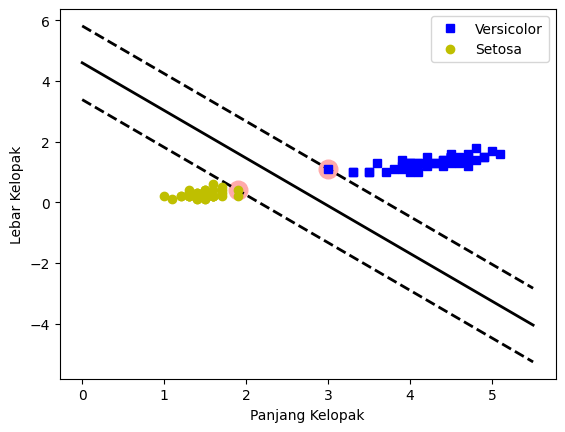

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Setosa")
plt.xlabel("Panjang Kelopak")
plt.ylabel("Lebar Kelopak")
plt.legend()
plt.show()


# Support Vector Machines

## Persiapan dan Dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load dataset iris (semua kelas)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## SVM dengan Kernel Linear

In [4]:
linear_svm = SVC(kernel="linear", C=1)
linear_svm.fit(X_train_scaled, y_train)
print("Akurasi (Linear):", linear_svm.score(X_test_scaled, y_test))


Akurasi (Linear): 1.0


## SVM dengan Kernel Polynomial

In [5]:
poly_svm = SVC(kernel="poly", degree=3, C=1)
poly_svm.fit(X_train_scaled, y_train)
print("Akurasi (Polynomial):", poly_svm.score(X_test_scaled, y_test))


Akurasi (Polynomial): 0.9736842105263158


## SVM dengan Kernel RBF (Gaussian)

In [6]:
rbf_svm = SVC(kernel="rbf", gamma='scale', C=1)
rbf_svm.fit(X_train_scaled, y_train)
print("Akurasi (RBF):", rbf_svm.score(X_test_scaled, y_test))


Akurasi (RBF): 1.0


## Tuning `C` dan `gamma`

In [7]:
for gamma in [0.01, 0.1, 1]:
    for C in [0.1, 1, 10]:
        model = SVC(kernel="rbf", gamma=gamma, C=C)
        model.fit(X_train_scaled, y_train)
        acc = model.score(X_test_scaled, y_test)
        print(f"Gamma: {gamma}, C: {C}, Akurasi: {acc:.2f}")


Gamma: 0.01, C: 0.1, Akurasi: 0.29
Gamma: 0.01, C: 1, Akurasi: 1.00
Gamma: 0.01, C: 10, Akurasi: 1.00
Gamma: 0.1, C: 0.1, Akurasi: 1.00
Gamma: 0.1, C: 1, Akurasi: 1.00
Gamma: 0.1, C: 10, Akurasi: 1.00
Gamma: 1, C: 0.1, Akurasi: 1.00
Gamma: 1, C: 1, Akurasi: 1.00
Gamma: 1, C: 10, Akurasi: 1.00


## Evaluasi dengan Confusion Matrix (RBF)

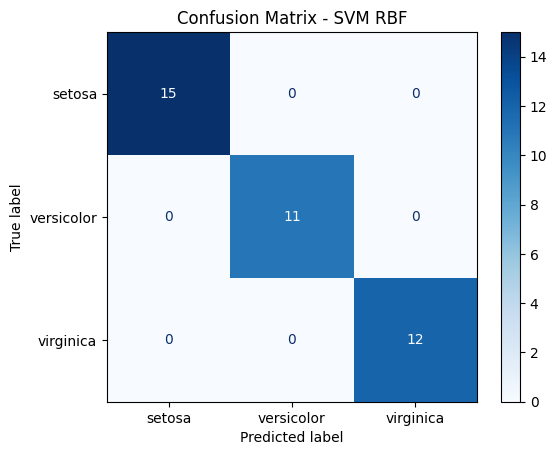

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rbf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM RBF")
plt.show()
